In [1]:
import pandas as pd

In [2]:
ev_data = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

In [3]:
print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA        98122        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA        98021        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA        98109        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA        98027        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA        98392        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           291.0   
1  Eligibility unknown as battery range has not b...             0.0   
2            Clean Alternative Fuel Vehicle 

In [4]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125925 entries, 0 to 125924
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         125925 non-null  object 
 1   County                                             125925 non-null  object 
 2   City                                               125925 non-null  object 
 3   State                                              125925 non-null  object 
 4   Postal Code                                        125925 non-null  int64  
 5   Model Year                                         125925 non-null  int64  
 6   Make                                               125925 non-null  object 
 7   Model                                              125925 non-null  object 
 8   Electric Vehicle Type                              125925 non-null  object

In [5]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 108
DOL Vehicle ID                                         1
Vehicle Location                                       2
Electric Utility                                       1
2020 Census Tract                                      1
dtype: int64

In [6]:
ev_data = ev_data.dropna()

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

<ipython-input-12-f410d4a797e1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")


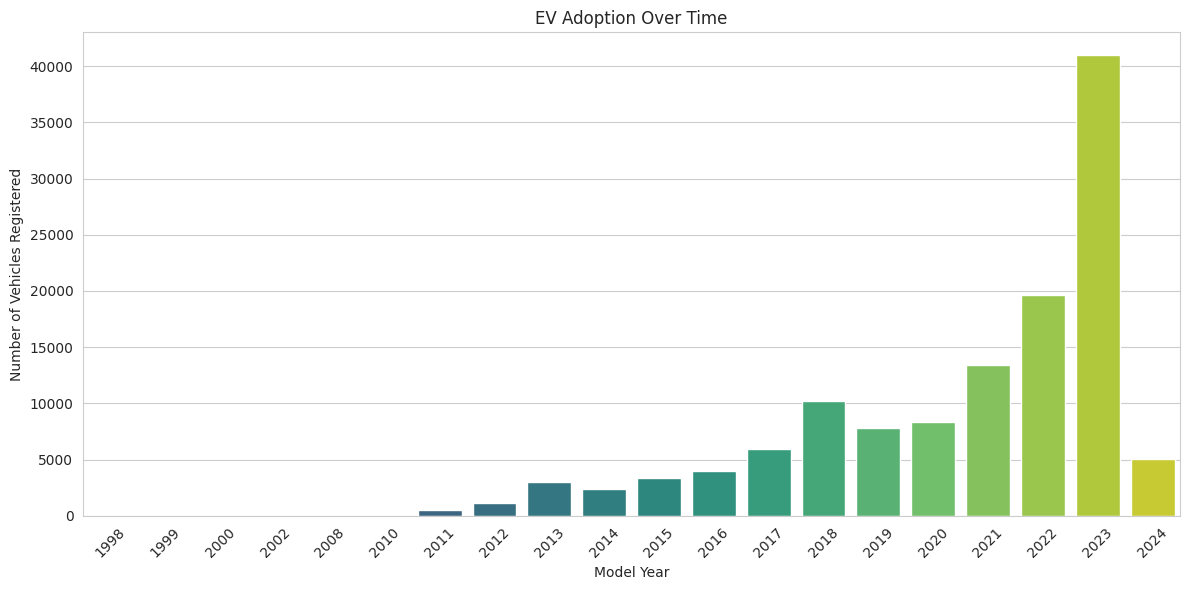

In [12]:
#EV Adoption over time
plt.figure(figsize=(12,6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
#Distribution at county
ev_county_distribution = ev_data['County'].value_counts()

In [17]:
top_counties = ev_county_distribution.head(3).index

In [23]:
#Filter dataset for top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

In [25]:
#Analyze the EV distribution in the cities of the top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

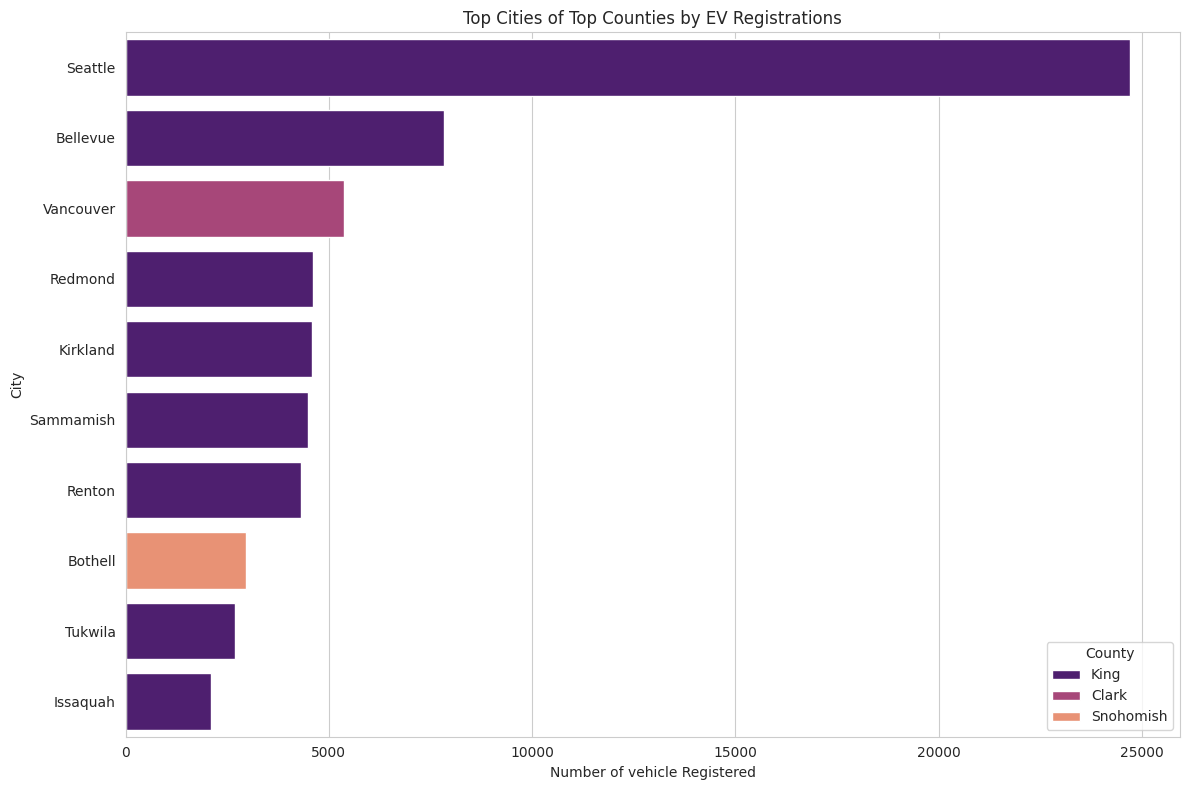

In [26]:
#Visualization of top 10 cities across the counties
top_cities = ev_city_distribution_top_counties.head(10)
plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles', y = 'City', hue = 'County', data = top_cities, palette="magma")
plt.title('Top Cities of Top Counties by EV Registrations')
plt.xlabel('Number of vehicle Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

<ipython-input-27-79e3430573dd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y = ev_type_distribution.index, palette = "rocket")


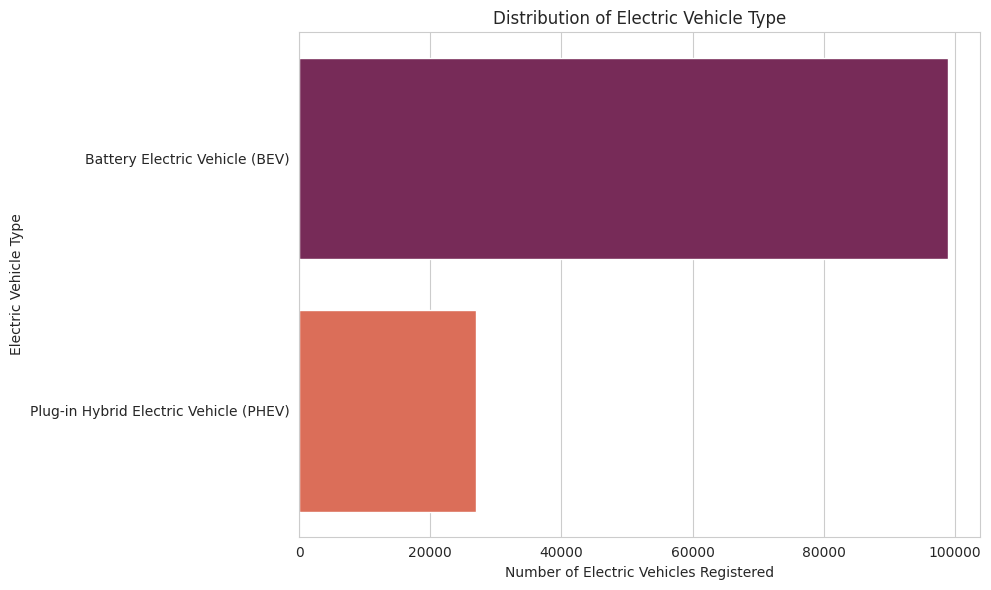

In [27]:
#Analyzing the distribution of types of EV
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=ev_type_distribution.values, y = ev_type_distribution.index, palette = "rocket")
plt.title('Distribution of Electric Vehicle Type')
plt.xlabel('Number of Electric Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

<ipython-input-28-9681d4cf31a9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y = ev_make_distribution.index, palette='cubehelix')


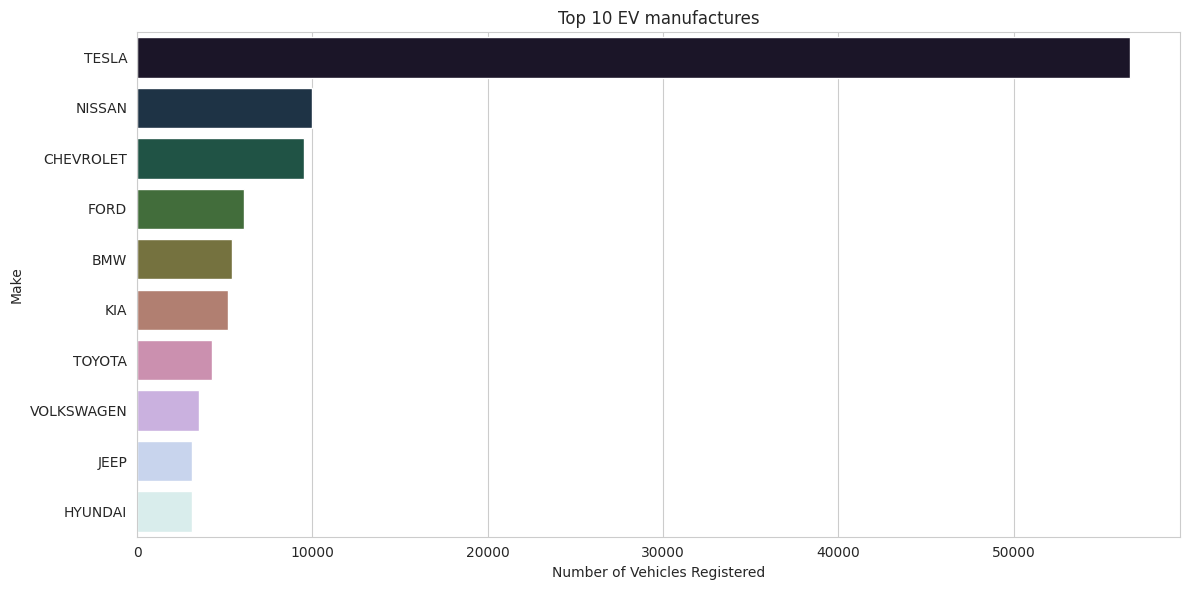

In [28]:
#Analyzing the EV manufactures
ev_make_distribution = ev_data['Make'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values, y = ev_make_distribution.index, palette='cubehelix')
plt.title('Top 10 EV manufactures')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

In [29]:
#Top 3 manufactures based on the registered vehicles
top_3_makes = ev_make_distribution.head(3).index

In [30]:
#Dataset of top 3 manufactures
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

In [34]:
#Analyzing the popularity in the top manufactures
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name = 'Number of Vehicles')

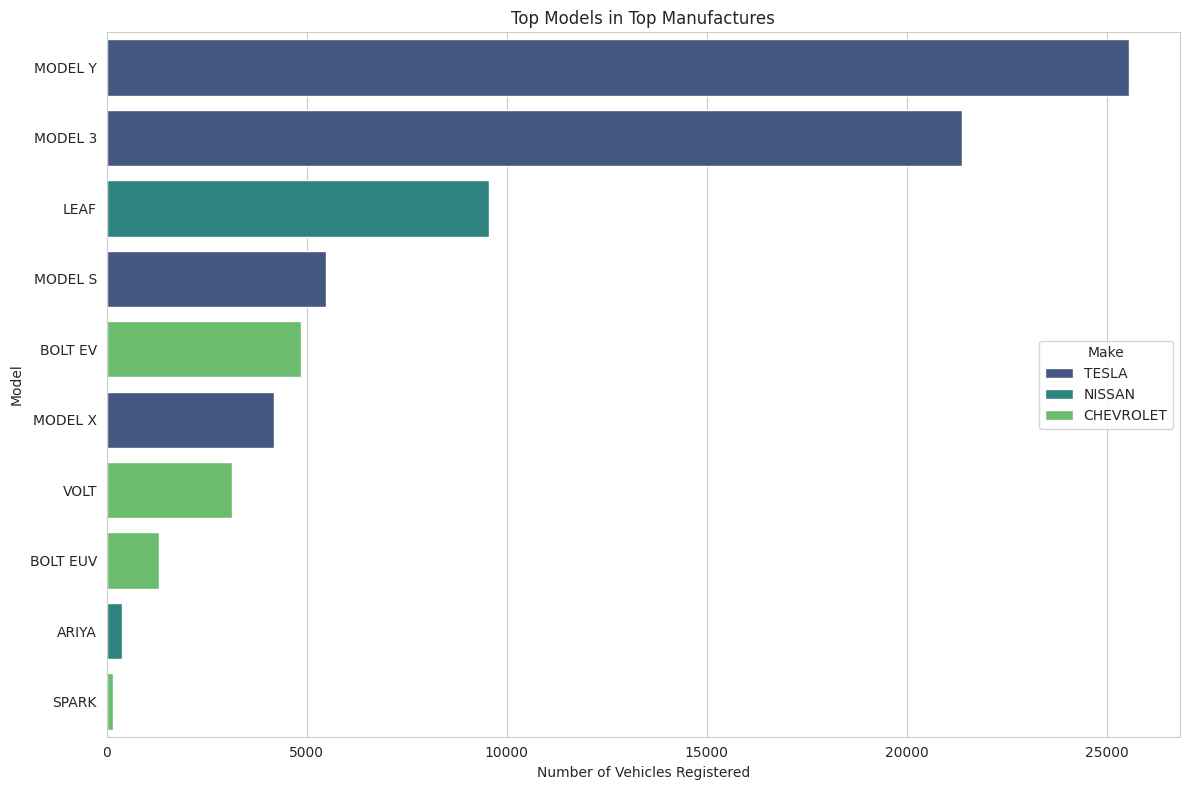

In [37]:
#Visualizing the top 10 models across the top manufactures
top_models = ev_model_distribution_top_makes.head(10)
plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles', y ='Model', hue ='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top Manufactures')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title = 'Make', loc = 'center right')
plt.tight_layout()
plt.show()

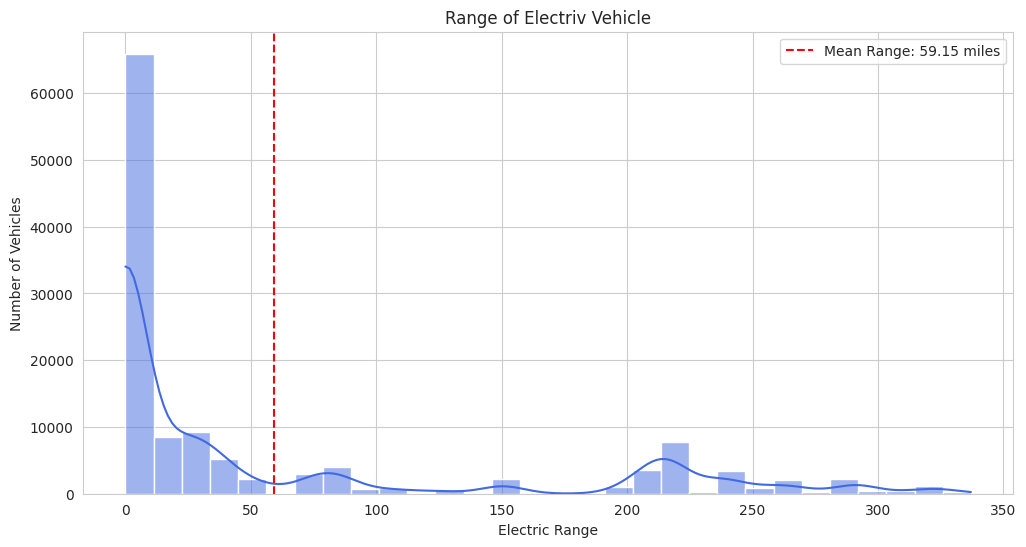

In [38]:
#Analyzing the range of EV
plt.figure(figsize=(12,6))
sns.histplot(ev_data['Electric Range'], bins = 30, kde=True, color='royalblue')
plt.title('Range of Electriv Vehicle')
plt.xlabel('Electric Range')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color = 'red', linestyle ='--', label =f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

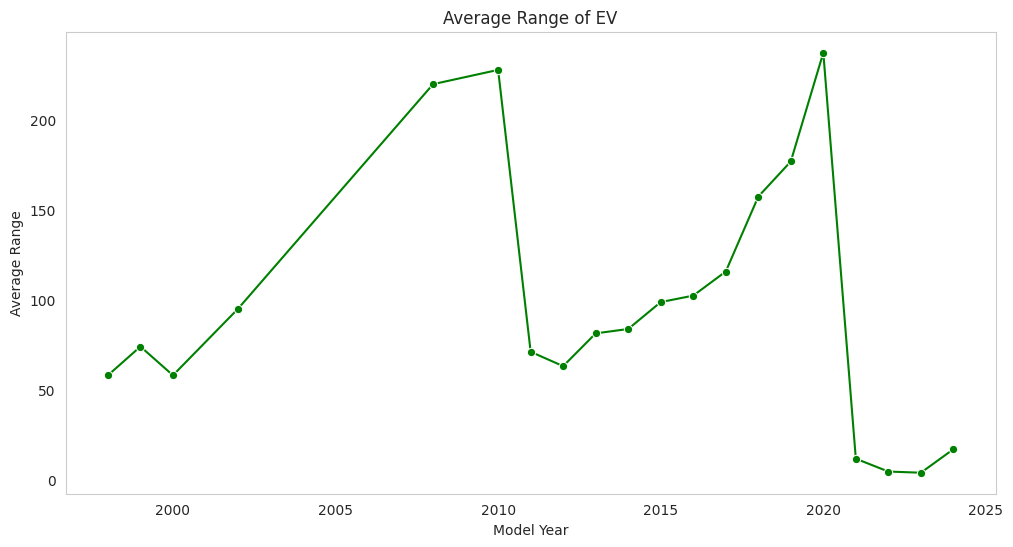

In [40]:
#Average range of EV
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Model Year', y = 'Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Range of EV')
plt.xlabel('Model Year')
plt.ylabel('Average Range')
plt.grid()
plt.show()

In [41]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()


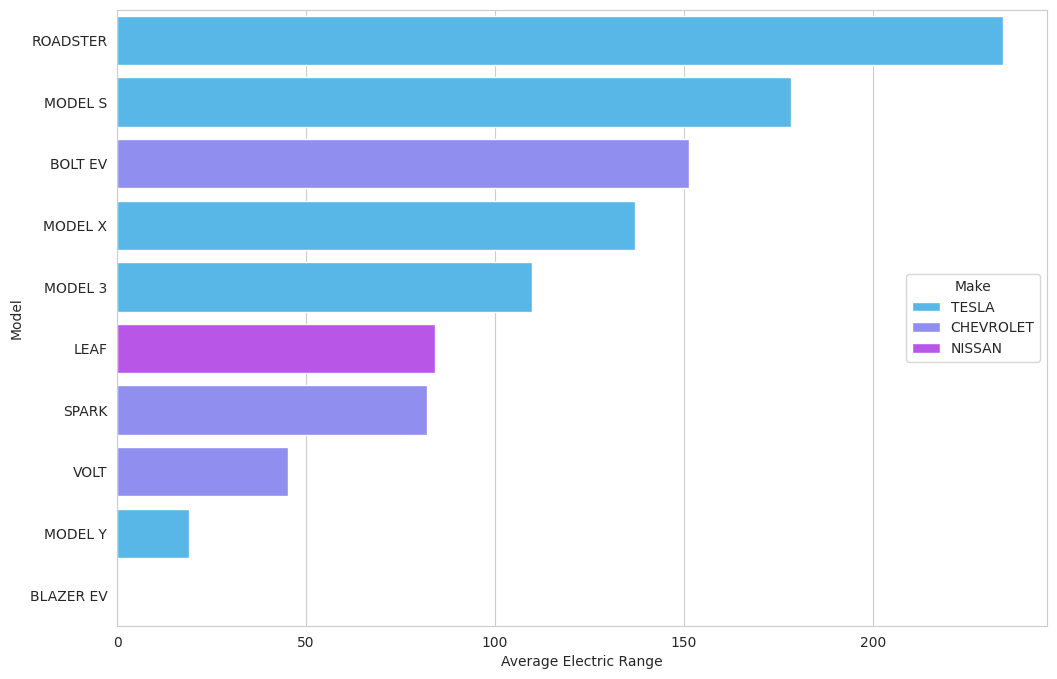

In [42]:
#Top 10 models with highest average electric range
top_range_models = average_range_by_model.head(10)
plt.figure(figsize=(12,8))
barplot=sns.barplot(x='Electric Range', y ='Model', hue='Make', data=top_range_models, palette = 'cool')
plt.title=('Top 10 Models by Average Electric Range')
plt.xlabel('Average Electric Range')
plt.ylabel('Model')
plt.legend(title='Make', loc ='center right')
plt.show()

In [43]:
#Number of EV's registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1998        1
1999        2
2000        7
2002        1
2008       15
2010       17
2011      537
2012     1108
2013     3005
2014     2422
2015     3392
2016     3938
2017     5962
2018    10238
2019     7771
2020     8339
2021    13422
2022    19646
2023    40964
2024     5029
Name: count, dtype: int64

In [44]:
#Calculate Compound Annual Growth Rate
from scipy.optimize import curve_fit
import numpy as np

In [45]:
#filtering dataset to include years with complete data(In this case assuming 2023 is the last complete year)
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

In [46]:
#define a function for exponential growth to fit the data
def exp_growth(x, a, b):
  return a*np.exp(b*x)

In [47]:
#Prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

In [48]:
#fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

In [49]:
#using the fitted function, forecast the numbers of EVs for 2024 and the next 5 years
forecast_years = np.arange(2024, 2024+6)-filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

In [51]:
#create a dictionary to display the forecasted values
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

In [52]:
print(forecasted_evs)

{2024: 56479.0230039193, 2025: 85694.87389569031, 2026: 130023.697674244, 2027: 197283.2351379819, 2028: 299335.240903689, 2029: 454177.3982173468}


In [53]:
#Estimate the market size data
#prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029+1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029+1)

In [56]:
#actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

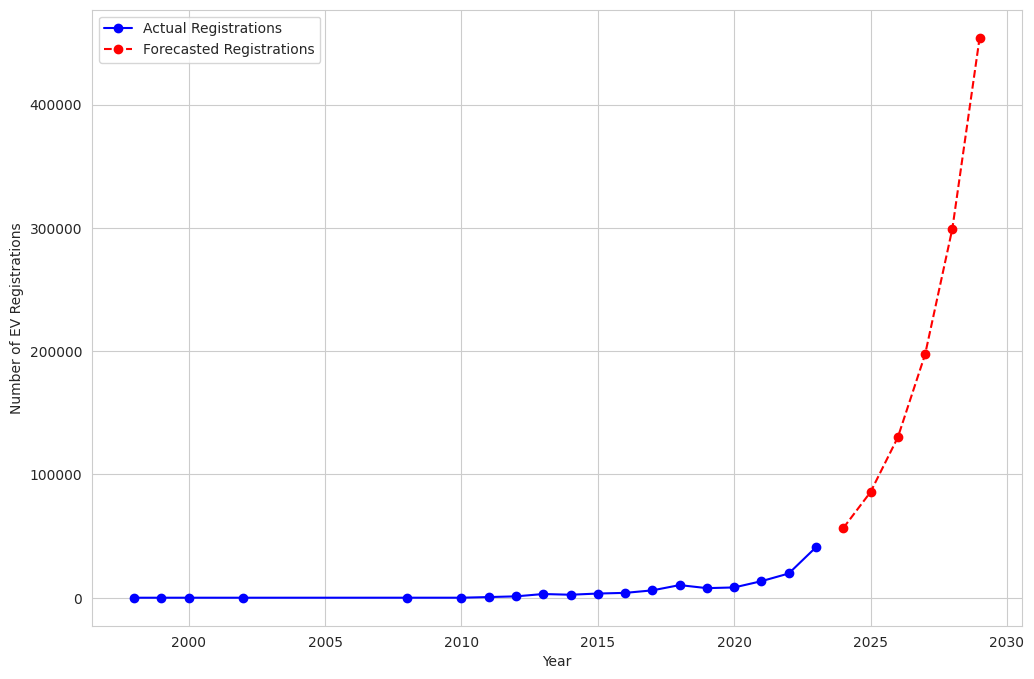

In [65]:
plt.figure(figsize=(12,8))
plt.plot(actual_years, actual_values, 'bo-', label = 'Actual Registrations')
plt.plot(forecast_years_full, forecasted_values, 'ro--', label ='Forecasted Registrations')


plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show()